In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv('placement.csv')

In [55]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

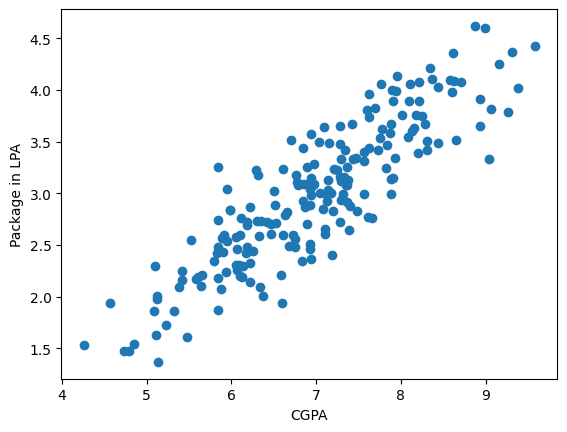

In [56]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [57]:
x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [58]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(xtrain, ytrain)

LinearRegression()

Text(0, 0.5, 'Package in LPA')

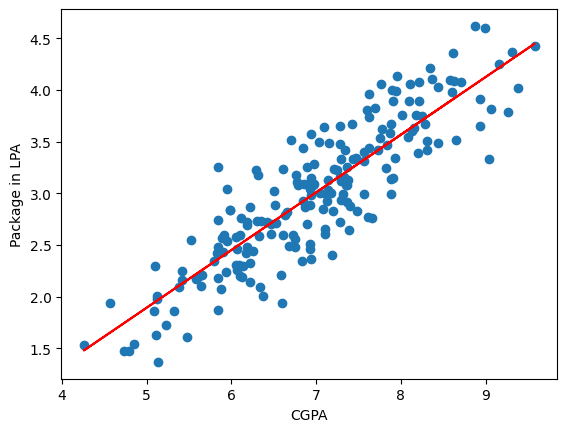

In [63]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(xtrain, lr.predict(xtrain), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
y_pred = lr.predict(xtest)

In [66]:
ytest.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [67]:
print("MAE", mean_absolute_error(ytest, y_pred))
print("MSE", mean_squared_error(ytest, y_pred))
print("RMsE", np.sqrt(mean_absolute_error(ytest, y_pred)))

MAE 0.2884710931878175
MSE 0.12129235313495527
RMsE 0.5370950504220063


In [68]:
print("MSE", r2_score(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

MSE 0.780730147510384


In [69]:
#adjusted R2 score
xtest.shape

(40, 1)

In [70]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [71]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.877238,3.26
1,5.12,0.696617,1.98
2,7.82,0.566523,3.25
3,7.42,0.075905,3.67
4,6.94,0.696589,3.57


Text(0, 0.5, 'Package in LPA')

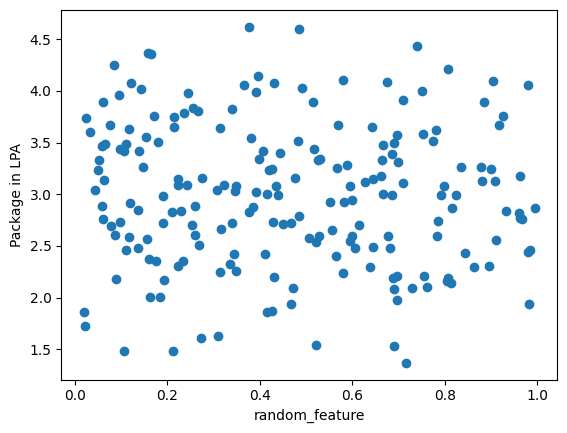

In [72]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package in LPA')

In [73]:
x = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [77]:
ypred = lr.predict(xtest)

In [78]:
print("R2 score", r2_score(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

R2 score 0.780730147510384


In [79]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7688777230514858

In [81]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [82]:
new_df2.sample(5)

,cgpa,iq,package
92,7.90,3.70,4.00
12,8.94,3.75,3.65
153,7.94,3.69,3.99
195,6.93,2.46,2.46
124,6.06,2.81,2.31


Text(0, 0.5, 'Package in LPA')

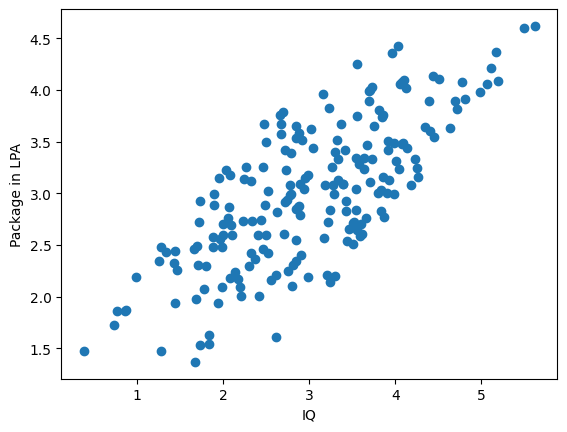

In [83]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('IQ')
plt.ylabel('Package in LPA')

In [84]:
np.random.randint(-100, 100)

4

In [85]:
x = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

In [88]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)

print("R2 score",r2_score(ytest,y_pred))
r2 = r2_score(ytest,y_pred)

1 - ((1-r2)*(40-1)/(40-1-2))

R2 score 0.8064222637456835


0.7959586023265313